# Testing SXS catalogue load

Objectives:

1. Test SXS simulation waveform loaded through nrc-catalogue-tools.

## Load the library

In [1]:
import sys

#p1 = "/home/vaishakp/Codes/custom_libraries/nr-catalog-tools"
#libpath = '/mnt/pfs/vaishak.p/Projects/Codes/custom_libraries/nr-catalog-tools'
libpath = '/home/vaishakprasad/Documents/Codes/nr-catalog-tools'

if libpath not in sys.path:
    sys.path.append(libpath)

print(sys.path)

['/home/vaishakprasad/Documents/Codes/nrcattools-local/test/notebooks', '/home/vaishakprasad/Documents/Codes/config', '/home/vaishakprasad/Documents/Codes/waveformtools', '/home/vaishakprasad/Documents/Codes/qlmtools', '/home/vaishakprasad/Documents/Codes/nrcattools-local/test/notebooks', '/home/vaishakprasad/soft/anaconda3/envs/nrcat/lib/python310.zip', '/home/vaishakprasad/soft/anaconda3/envs/nrcat/lib/python3.10', '/home/vaishakprasad/soft/anaconda3/envs/nrcat/lib/python3.10/lib-dynload', '', '/home/vaishakprasad/soft/anaconda3/envs/nrcat/lib/python3.10/site-packages', '/home/vaishakprasad/Documents/Codes/nr-catalog-tools']


## Display the environment

In [2]:
%%bash
python --version
conda info --envs | grep '*'

Python 3.10.11
nrcat                 *  /home/vaishakprasad/soft/anaconda3/envs/nrcat


# Method I : through nr-catalogue-tools

In [3]:
import nrcatalogtools
import nrcatalogtools.lvc as lalutils
#from nrcatalogtools.lvc import get_lal_mode_dictionary_from_lmax
#from nrcatalogtools.rit import RITCatalog
from nrcatalogtools import utils
from nrcatalogtools.waveform import WaveformModes
import sxs

import numpy as np
from nrcatalogtools.sxs import SXSCatalog
import matplotlib.pyplot as plt


import numpy as np
import waveformtools
import matplotlib.pyplot as plt

#####################
# matplotlib presets
#########################################

labelsize=16
labelpad=14

plt.rcParams.update({'font.size': 12})
plt.rcParams.update({"figure.figsize" : (8,6)})
#plt.rcParams.update({"axes.grid" : True})
plt.rcParams.update({"axes.labelpad" : labelpad})
plt.rcParams.update({"axes.labelsize" : labelsize})
plt.rcParams.update({"figure.autolayout" : True})
plt.rcParams.update({"grid.alpha" : 0.3})
plt.rcParams.update({"grid.alpha" : 0.3})
plt.rcParams.update({'legend.markerscale': 12})

No version information file '.version' found


### SXS cat details

In [4]:
# View SXS cache
sxsdir = sxs.sxs_directory("cache")
sxsdir

PosixPath('/home/vaishakprasad/.cache/sxs')

In [11]:
# Simulation name
sim_name = 'SXS:BBH:0001'

# Parameters
M = 40
D = 1000
inc = 0
coa_phase = np.pi/4
delta_t = 1./(4*2048)

# Convention

hp1, hx1, h1... : nrcat waveforms

wfa1, hp2, hx2, ... : waveformtools waveforms

## Load waveform

In [6]:
sxs1 = SXSCatalog.load(download=False)

In [8]:
sxsw = sxs1.get(sim_name, extrapolation_order=2)

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Found the following files to load from the SXS catalog:
    SXS:BBH:0001v6/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


/home/vaishakprasad/soft/anaconda3/envs/nrcat/lib/python3.10/site-packages/sxs/waveforms/nrar.py:176: UserWarning: 
Could not find root group as `h5_group` or as `extrapolation_order`; returning all groups
  warnings.warn(warning)


In [7]:
help(sxs1.get)

Help on method get in module nrcatalogtools.sxs:

get(sim_name, extrapolation_order=2) method of nrcatalogtools.sxs.SXSCatalog instance



In [9]:
sxsw.get_mode(2, 2).shape

(27336, 3)

In [62]:
# 2, 2 mode of the waveform
h1_22 = sxsw.get_mode(2, 2)[:, 1]
h1_t22 = sxsw.get_mode(2, 2)[:, 0]
h1_p22 = sxsw.get_mode(2, 2)[:, 1]
h1_x22 = sxsw.get_mode(2, 2)[:, 2]

In [67]:
wf1_22 = h1_p22 + 1j*h1_x22

In [63]:
len(h1_p22), len(h1_p22)

(27336, 27336)

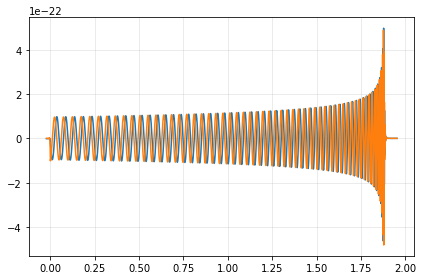

In [48]:
hpc = sxsw.get_td_waveform(total_mass=M, distance=D, inclination=inc,
                    coa_phase=coa_phase, delta_t=delta_t
                    )
hpc_pycbc = hpc # mwf.to_pycbc(hpc)
hp1, hx1 = hpc_pycbc.real(), hpc_pycbc.imag()



plt.plot(hp1.sample_times, hp1)
plt.plot(hx1.sample_times, hx1)
plt.grid()
plt.show()

In [14]:
# Recenter the axis of td waveform about max amp
mloc = np.argmax(np.array(hp1)**2 + np.array(hx1)**2)
mtime = hp1.sample_times[mloc]
mtime

1.8777177375625

# Method II :

Using [waveformtools](https://gitlab.com/vaishakp/waveformtools.git)

## Load the modes from disk

In [15]:
fdir = "/home/vaishakprasad/.cache/sxs/SXS:BBH:0001v3/Lev5"
fname = 'rhOverM_Asymptotic_GeometricUnits_CoM.h5'
#get_ell_max_RIT(fdir)

In [16]:
from waveformtools.waveforms import modes_array

In [64]:
wf2 = modes_array(label='sxs_001', spin_weight=-2)
wf2.file_name = fname
wf2.data_dir = fdir
wf2.load_modes(ftype='SpEC', var_type='strain', ell_max='auto', resam_type='auto', extrap_order=2)
wf2.get_metadata()

Passing /home/vaishakprasad/.cache/sxs/SXS:BBH:0001v3/Lev5 rhOverM_Asymptotic_GeometricUnits_CoM.h5
Chosen ell max 8 Available ell_max 8
Using extrap order 2
Constructing the modes list
Creating modes data
Min dt 0.05718379830432241 and Max dt 0.5000603551985208
Resampling at the default timestep 0.4999991653913156
auto


/home/vaishakprasad/Documents/Codes/waveformtools/waveformtools/dataIO.py:921: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  dt_auto = mode(np.diff(time_axis))[0][0]


{'label': 'sxs_001',
 'data_dir': '/home/vaishakprasad/.cache/sxs/SXS:BBH:0001v3/Lev5',
 'file_name': 'rhOverM_Asymptotic_GeometricUnits_CoM.h5',
 'key_format': None,
 'ell_max': 8,
 'modes_list': [[2, [-2, -1, 0, 1, 2]],
  [3, [-3, -2, -1, 0, 1, 2, 3]],
  [4, [-4, -3, -2, -1, 0, 1, 2, 3, 4]],
  [5, [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]],
  [6, [-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6]],
  [7, [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7]],
  [8, [-8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]]],
 'r_ext': 500,
 'frequency_axis': None,
 'out_file_name': None,
 'maxtime': None,
 'date': '2023-04-24',
 'time': '21:05:07',
 'key_ex': None,
 'spin_weight': -2,
 'extrap_order': 2}

In [55]:
np.diff(h1_t22)[0], wf2.delta_t()

(0.4999991653913156, 0.499999165391273)

### The sampling is same for majority of inspiral for the waveforms loaded through two methods

In [56]:
wf2.mode(2, 2)

array([0.00043511+0.00102152j, 0.00043696+0.00101562j,
       0.00043871+0.00100972j, ..., 0.00035571-0.00020485j,
       0.00035591-0.00020618j, 0.00035601-0.00020756j])

In [80]:
# Get max location of 2, 2 mode and recenter the time axis
wf1_amp = np.absolute(wf1_22)
wf2_amp = np.absolute(wf2.mode(2,2))


In [113]:
(wf1_amp.imag==0).all()

True

In [82]:
mt2 = h1_t22[np.argmax(wf1_amp)]
h1_t22-=mt2
mt2 = h1_t22[np.argmax(wf1_amp)]
print(mt2)

0.0


In [83]:
wf2.time_axis[np.argmax(wf2_amp)]

0.0

In [84]:
from waveformtools.waveformtools import interp_resam_wfs

## Plot the 2,2 waveforms, differences (before any alignment, but centered at 0)

In [115]:
# Resample wf1 modes to compare with wf2
wf1_22r = interp_resam_wfs(wf1_22, h1_t22, wf2.time_axis[10:-10], resam_kind='cubic')

In [116]:
wf1_ampr = np.absolute(wf1_22r)

In [117]:
(wf1_ampr.imag==0).all()

True

In [120]:
index1 = np.argmax(wf1_ampr)
index2 = np.argmax(wf2_amp)

In [121]:
wf2.time_axis[index1], wf2.time_axis[index2]

(-4.99999165391273, 0.0)

In [122]:
from waveformtools.waveformtools import lengtheq, roll

In [123]:
wf1_ampr, wf2_ampr, flag = lengtheq(wf1_ampr, wf2_amp)
flag

'a'

In [124]:
index1 = np.argmax(wf1_ampr)
index2 = np.argmax(wf2_amp)

In [125]:
wf2.time_axis[index1], wf2.time_axis[index2]

(-4.99999165391273, 0.0)

In [126]:
wf2.time_axis[index1]/wf2.delta_t()

-10.0

In [127]:
wf1_amprr = roll(wf1_ampr, 10)

In [130]:
(wf1_amprr.imag==0).all()

True

In [132]:
index1 = np.argmax(wf1_amprr)
index2 = np.argmax(wf2_amp)

In [133]:
index1, index2

(19277, 19277)

In [134]:
wf2.time_axis[index1], wf2.time_axis[index2]

(0.0, 0.0)

In [136]:
damp = wf1_amprr - wf2_ampr

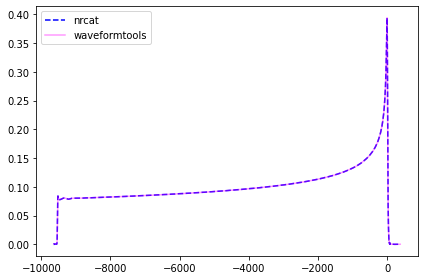

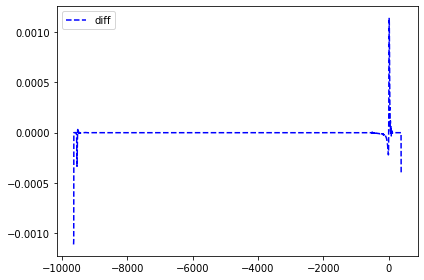

In [137]:
plt.plot(wf2.time_axis, wf1_amprr, linestyle='--', c='blue', label='nrcat')
plt.plot(wf2.time_axis, wf2_amp, c='magenta', alpha=0.4, label='waveformtools')
plt.legend()
plt.show()


plt.plot(wf2.time_axis, damp, linestyle='--', c='blue', label='diff')
#plt.plot(wf2.time_axis, wf2_amp, c='magenta', alpha=0.4, label='waveformtools')
plt.legend()
plt.show()

In [141]:
np.amax(np.absolute(damp))/np.amax(wf1_amprr), np.amax(np.absolute(damp))/np.amax(wf2_amp)

(0.0028985249166309664, 0.0028989797515585956)

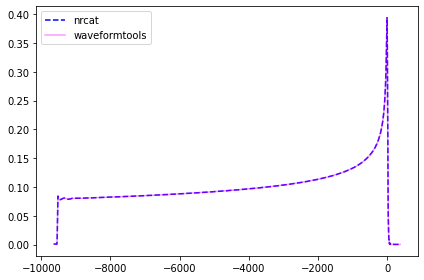

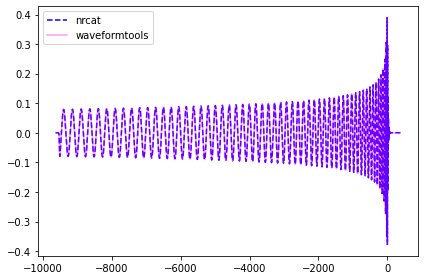

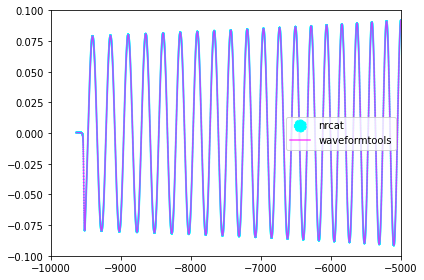

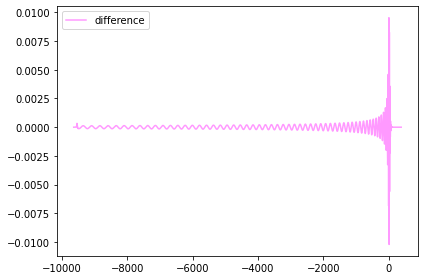

In [30]:



plt.plot(h1_t22, h1_p22, linestyle='--', c='blue', label='nrcat')
plt.plot(wfa1.time_axis, wfa1.mode(2, 2).real, c='magenta', alpha=0.4, label='waveformtools')
plt.legend()
plt.show()

plt.scatter(h1_t22, h1_p22, linestyle='--', c='cyan', label='nrcat', s=1)
plt.plot(wfa1.time_axis, wfa1.mode(2, 2).real, c='magenta', alpha=0.7, label='waveformtools')
plt.legend()
plt.xlim(-10000, -5000)
plt.ylim(-0.1, 0.1)
plt.show()

# Resample wf1 modes to compare with wf2
h1_p22r = interp_resam_wfs(h1_p22, h1_t22, wfa1.time_axis[10:-10], resam_kind='cubic')


dh = (h1_p22r - wfa1.mode(2,2).real[10:-10])

#plt.plot(ht22, h22, linestyle='--', c='blue')
plt.plot(wfa1.time_axis[10:-10], dh, c='magenta', alpha=0.4, label='difference')
plt.legend()
plt.show()

## Time axis limits, waveformtools vs nrcat loaded waveforms

In [22]:
wfa1.time_axis[0], wfa1.time_axis[-1]

(-9638.483911248391, 381.9993623589653)

In [23]:
h1_t22[0], h1_t22[-1]

(-9638.41904419871, 382.2925551169119)

# Difference in max amp of hp

In [41]:
np.amax(h1_22)

0.3892116015028257

In [42]:
np.amax(wfa1.mode(2,2).real)

0.3891424115692274

## Get time domain waveform through waveformtools

In [43]:
taxis, hp2, hx2 = wfa1.to_td_waveform(Mtotal=M, distance=D, incl_angle=inc, delta_t=delta_t)
h2 = hp2 + 1j*hx2

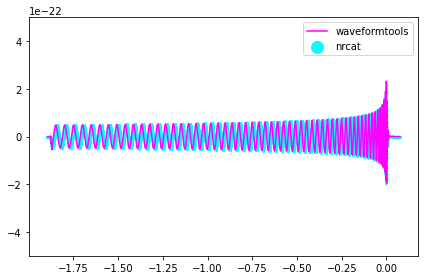

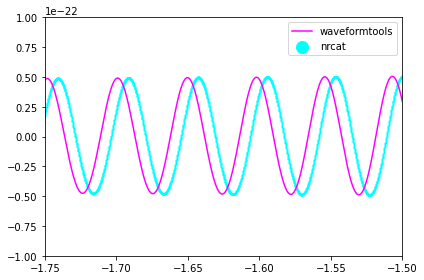

In [44]:
plt.plot(taxis, hp2, label='waveformtools', c='magenta')
#plt.plot(t, hc2, color=[0.1,0,0])
plt.scatter(hp1.sample_times - mtime, hp1, label='nrcat', s=1, c='cyan')
#plt.plot(hc1.sample_times, hc1)
plt.ylim(-5e-22, 5e-22)
plt.legend()
plt.show()


plt.plot(taxis, hp2, label='waveformtools', c='magenta')
#plt.plot(t, hc2, color=[0.1,0,0])
plt.scatter(hp1.sample_times - mtime, hp1, label='nrcat', s=1, c='cyan')
#plt.plot(hc1.sample_times, hc1)
plt.ylim(-1e-22, 1e-22)
plt.xlim(-1.75, -1.5)
plt.legend()
plt.show()

# Compare td waveform

In [45]:
len(hp1), len(hp2)

(16174, 16130)

from importlib import reload
reload(waveformtools.waveformtools)

In [46]:
from waveformtools.waveformtools import lengtheq, match_wfs
h = lengtheq(np.array(h1), h2)
_, h2, flag = h
print(f'Waveform {flag} length changed')
hp2 = h2.real
hx2 = h2.imag

Waveform b length changed


In [47]:
from pycbc.types.timeseries import TimeSeries
from pycbc.filter.matchedfilter import match
from pycbc.waveform.utils import coalign_waveforms

In [48]:
hp2_ts = TimeSeries(hp2, delta_t=delta_t)
hx2_ts = TimeSeries(hx2, delta_t=delta_t)

mp, sp = match(hp1, hp2_ts)
print('Plus match', mp, sp)
mx, sx = match(hx1, hx2_ts)
print('Cross match', mx, sx)

wf1_p, wf2_p = coalign_waveforms(hp1, hp2_ts)
wf1_x, wf2_x = coalign_waveforms(hx1, hx2_ts)

# Normalize the arrays
wf1 = np.array(wf1_p) + 1j*np.array(wf1_x)
wf2 = np.array(wf2_p) + 1j*np.array(wf2_x)

n1 = np.sqrt(np.dot(wf1, np.conjugate(wf1)))
n2 = np.sqrt(np.dot(wf2, np.conjugate(wf2)))

wf1 = wf1/n1
wf2 = wf2/n2

wf1_p = wf1.real
wf1_x = wf1.imag

wf2_p = wf2.real
wf2_x = wf2.imag

wf1_p = TimeSeries(wf1_p, delta_t)
wf1_x = TimeSeries(wf1_x, delta_t)
wf2_p = TimeSeries(wf2_p, delta_t)
wf2_x = TimeSeries(wf2_x, delta_t)

Plus match 0.9870067974223472 16130
Cross match 0.9876747377240004 16130


# Plot aligned td waveforms

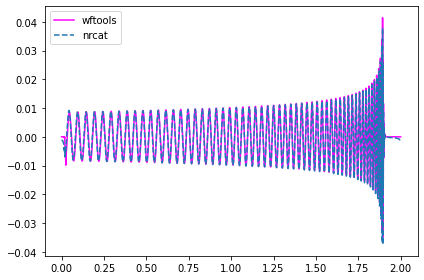

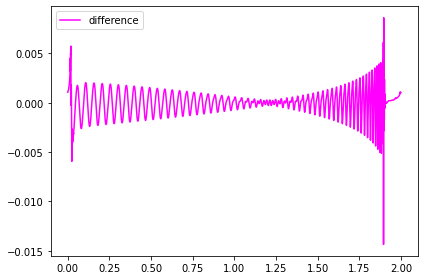

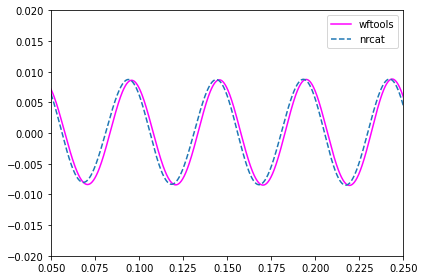

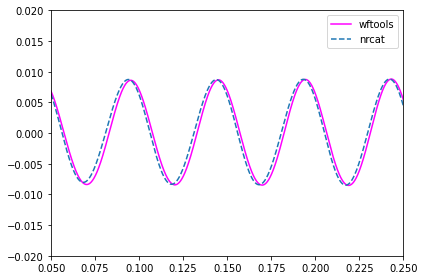

In [49]:
plt.plot(wf2_p.sample_times, wf2_p, c='magenta', label='wftools')
#plt.plot(t, hc2, color=[0.1,0,0])
plt.plot(wf1_p.sample_times, wf1_p, label='nrcat', linestyle='--')
#plt.plot(hc1.sample_times, hc1)
plt.legend()
plt.show()



dwf = wf2_p - wf1_p

plt.plot(wf2_p.sample_times, dwf, c='magenta', label='difference')
#plt.plot(t, hc2, color=[0.1,0,0])
#plt.plot(wf1_p.sample_times, wf1_p, label='nrcat', linestyle='--')
#plt.plot(hc1.sample_times, hc1)
plt.legend()
plt.show()



plt.plot(wf2_p.sample_times, wf2_p, c='magenta', label='wftools')
#plt.plot(t, hc2, color=[0.1,0,0])
plt.plot(wf1_p.sample_times, wf1_p, label='nrcat', linestyle='--')
#plt.plot(hc1.sample_times, hc1)
plt.ylim(-0.02, 0.02)
plt.xlim(0.05, 0.25)
plt.legend()
plt.show()



plt.plot(wf2_p.sample_times-4*delta_t, wf2_p, c='magenta', label='wftools')
#plt.plot(t, hc2, color=[0.1,0,0])
plt.plot(wf1_p.sample_times, wf1_p, label='nrcat', linestyle='--')
#plt.plot(hc1.sample_times, hc1)
plt.ylim(-0.02, 0.02)
plt.xlim(0.05, 0.25)
plt.legend()
plt.show()

## Seems to be an alignment issue. Check with own alignment function

# Tests

In [32]:
def RMSerrs(func1, func2):
    ''' Compute and return the error estimates between two arrays
    
    Parameters
    ----------
    func1, func2 : ndarray
                   Arrays of same shape to compare with.
    info : sphericalarray
           Grid info
    
    Returns
    -------
    RMS : float
          The RMS error
    Amax : float
           The max diff relative to A1max
    Amin : float the min diff relative to A2max
    '''
    A1max = np.amax(np.absolute(func1))

    diff = (func1 - func2)

    Amax = np.amax(diff)/A1max
    Amin = np.amin(diff)/A1max

    RMS = np.sqrt(np.sum(np.absolute(diff)**2)/len(func1))/A1max

    return RMS, Amin, Amax

In [33]:
import unittest


class TestSXS(unittest.TestCase):
    ''' Test loading of SXS waveforms '''
    
    def test_waveforms(self):
        ''' Test the SXS loading of waveforms against 
        that loading using waveformtools. Tested are RMS errors, maximum deviation and mismatches'''
        
      
        
        # L2 errors
        Res_p, Amin_p, Amax_p = RMSerrs(np.array(wf1_p), np.array(wf2_p))
        Res_x, Amin_x, Amax_x = RMSerrs(np.array(wf1_x), np.array(wf2_x))
        
        #Amin_p/=A1max
        #Amin
        # Match
        match_p, shift_p = match(wf1_p, wf2_p)
        match_x, shift_x = match(wf1_x, wf2_x)

        mismatch_p = 100*(1-match_p)
        mismatch_x = 100*(1-match_x)
        
        max_mismatch = max(mismatch_p, mismatch_x)
        
        print(f'Mismatch is {max_mismatch}')
        
        prec = 1
        # RMS error should be less than 0.1 x Amax(wf1)
        self.assertAlmostEqual(Res_p, 0, prec, f"The RMS error between the + components of the waveforms must be atmost 0.1 times Max amplitude of the normalized waveform")
        self.assertAlmostEqual(Res_x, 0, prec, f"The RMS error between the x components of the waveforms must be almost 0.1 times Max amplitude of the normalized waveform")
        
        prec = 0
        # Max relative point-wise deviation w.r.t Amax(wf1) should be less than 1 (100)%
        self.assertAlmostEqual(np.absolute(Amin_p), 0, prec, f"The maximum lower deviation between the + components of the waveforms must be almost 100%")
        self.assertAlmostEqual(np.absolute(Amax_p), 0, prec, f"The maximum upper deviation between the x components of the waveforms must be almost 100%")
        
        self.assertAlmostEqual(np.absolute(Amax_p), 0, prec, f"The maximum upper deviation between the + components of the waveforms must be almost 0")
        self.assertAlmostEqual(np.absolute(Amax_p), 0, prec, f"The maximum upper deviation between the x components of the waveforms must be almost 0")
        
        prec = 1
        # Mismatch should be less than 0.1%
        self.assertAlmostEqual(mismatch_p, 0, prec, f"The mismatch between the + components of the waveforms must be almost 0.1%")
        self.assertAlmostEqual(mismatch_p, 0, prec, f"The mismatch between the x components of the waveforms must be almost 0.1%")

       
        prec=1
        # Full array
        np.testing.assert_almost_equal(wf1, wf2, prec)
        
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False, verbosity=2)

test_waveforms (__main__.TestSXS)
Test the SXS loading of waveforms against ... FAIL

FAIL: test_waveforms (__main__.TestSXS)
Test the SXS loading of waveforms against
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-33-9c1b21c0ed3f>", line 45, in test_waveforms
    self.assertAlmostEqual(mismatch_p, 0, prec, f"The mismatch between the + components of the waveforms must be almost 0.1%")
AssertionError: 1.2988815726585057 != 0 within 1 places (1.2988815726585057 difference) : The mismatch between the + components of the waveforms must be almost 0.1%

----------------------------------------------------------------------
Ran 1 test in 0.040s

FAILED (failures=1)


Mismatch is 1.2988815726585057
